# Film distribution market research

**Aim** - to study the Russian film distribution market and identify current trends

The customer of the study is the Ministry of Culture of the Russian Federation. For the study, data published on the open data portal of the Ministry of Culture were used: information on distribution certificates, fees and state support for films, as well as information from the KinoPoisk website.

**Main areas of research:**
- Track the dynamics of fees by years
- Analyze what affects film box office
- Select films with state support and evaluate their fees and ratings
- Find patterns by which grants are allocated

**The study contains the following steps:**
1. Overview of data
2. Data preprocessing
3. Hypothesis testing
4. Conclusions

## Data Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies_df = pd.read_csv('mkrf_movies.csv')
movies_df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [3]:
shows_df = pd.read_csv('mkrf_shows.csv')
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [4]:
shows_df['puNumber'] = shows_df['puNumber'].astype(str)

In [5]:
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


You need to join two tables. We can do this on the `puNumber` column. To do this, we have reduced the data in this column to one type.

In [6]:
total_df = movies_df.merge(shows_df, on='puNumber', how='left')
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [7]:
total_df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


**Resume**

- The data contains information about 7486 films.
- There are 16 columns in the general table, among which 4 are float, 12 are object.
- The names of the columns are informative and correspond to the style.
- There are missing values in many columns.

*The first stage of the project will be data pre-processing to remove and evaluate the impact of omissions, as well as correct data types.*

## Data preprocessing

### Type

In [8]:
total_df['show_start_date'] = pd.to_datetime(total_df['show_start_date']).dt.date
total_df['show_start_date'] = pd.to_datetime(total_df['show_start_date'])

### Missing values

In [9]:
for col in total_df.columns:
    pct_missing = np.mean(total_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

title - 0%
puNumber - 0%
show_start_date - 0%
type - 0%
film_studio - 0%
production_country - 0%
director - 0%
producer - 8%
age_restriction - 0%
refundable_support - 96%
nonrefundable_support - 96%
budget - 96%
financing_source - 96%
ratings - 13%
genres - 13%
box_office - 58%


In [10]:
def investigate_column(column):
    print('Null or Na count is', column.isna().sum())
    print(column.describe())
    

#### `film_studio`


In [11]:
investigate_column(total_df['film_studio'])

Null or Na count is 18
count                      7468
unique                     5490
top       Киностудия "Мосфильм"
freq                        341
Name: film_studio, dtype: object


In [12]:
total_df.dropna(subset=['film_studio'], inplace=True)
total_df['film_studio'].isna().sum()


0

Since very few values are missing and there is no way to fill in the gaps with adequate values, these rows are removed so as not to affect further analysis.

#### `production_country`

In [13]:
investigate_column(total_df['production_country'])


Null or Na count is 1
count     7467
unique     950
top        США
freq      2172
Name: production_country, dtype: object


In [14]:
total_df[total_df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0


In [15]:
total_df.loc[3186, 'production_country'] = 'Россия'


We found one missing value in the column and filled it in manually.

#### `director`

In [16]:
investigate_column(total_df['director'])

Null or Na count is 8
count           7460
unique          4797
top       О.Семёнова
freq              47
Name: director, dtype: object


In [17]:
total_df[total_df['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


In [18]:
total_df['director'].fillna('Unknown', inplace=True)


Fill missing values with 'Unknown' so as not to delete rows, and gaps did not affect further analysis.

#### `producer`

In [19]:
investigate_column(total_df['producer'])


Null or Na count is 567
count          6901
unique         5334
top       П.Смирнов
freq             67
Name: producer, dtype: object


In [20]:
total_df['producer'].fillna('Unknown', inplace=True)


Fill missing values with 'Unknown' so as not to delete rows, and gaps did not affect further analysis.

#### `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`

In [21]:
investigate_column(total_df['refundable_support']) 


Null or Na count is 7136
count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64


The data in these columns are only for government-supported films, which are only 4%. We will not do anything with these columns.

#### `ratings`

In [22]:
investigate_column(total_df['ratings']) 

Null or Na count is 954
count     6514
unique      94
top        6.6
freq       312
Name: ratings, dtype: object


In [23]:
total_df['ratings'].value_counts(ascending=True).head(20)

9.1    1
64%    1
62%    1
90%    1
19%    1
9.2    1
1.0    1
89%    1
8.9    1
1.9    1
1.8    1
1.2    1
28%    1
1.3    1
1.4    2
1.7    2
79%    2
9.0    2
2.1    2
98%    2
Name: ratings, dtype: int64

The data in a column is presented in different formats. Bring them to one form.

In [24]:
total_df['ratings'] = total_df['ratings'].str.rstrip('%').astype(float)


In [25]:
total_df['ratings'] = total_df['ratings'].apply(lambda x: x if x <= 10 else x / 10)

In [26]:
total_df['ratings'].describe()

count    6514.000000
mean        6.488210
std         1.114435
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64

In [27]:
investigate_column(total_df['ratings'])

Null or Na count is 954
count    6514.000000
mean        6.488210
std         1.114435
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64


#### `genres`

In [28]:
investigate_column(total_df['genres']) 

Null or Na count is 963
count      6505
unique      741
top       драма
freq        476
Name: genres, dtype: object


In [29]:
total_df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [30]:
total_df[total_df['genres'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Unknown,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
total_df['genres'].fillna('Unknown', inplace=True)

Заменили пропуски на 'Unknown', чтобы не удалять строки, и пропуски не влияли на дальнейший анализ.

#### `box_office`

In [32]:
investigate_column(total_df['box_office'])

Null or Na count is 4311
count    3.157000e+03
mean     7.650291e+07
std      2.403873e+08
min      0.000000e+00
25%      8.638600e+04
50%      2.330104e+06
75%      2.398312e+07
max      3.073569e+09
Name: box_office, dtype: float64


### Duplicates

In [33]:
total_df.duplicated().sum()

0

In [34]:
total_df['puNumber'].value_counts()

221054410    2
221154310    2
221048915    1
221041611    1
121004611    1
            ..
111005015    1
111004615    1
111004715    1
114000515    1
124010719    1
Name: puNumber, Length: 7466, dtype: int64

In [35]:
total_df[(total_df['puNumber'] == '221154310') | (total_df['puNumber'] == '221054410')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [36]:
total_df[total_df['title'].duplicated(keep=False)].sort_values(by='title')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
454,100 миллионов евро,221024616,2016-05-25,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
455,100 миллионов евро,121013712,2012-06-06,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
5058,127 часов,221069011,2011-05-18,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
4852,127 часов,121000811,2011-01-27,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,Этим утром в Нью-Йорке,221033214,2014-08-20,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.2,"драма,комедия",1090.0
4071,Я ненавижу день святого Валентина,121002010,2010-02-04,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
4505,Я ненавижу день святого Валентина,221139210,2010-12-03,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
1703,"Я, снова я и мама",121013116,2016-05-23,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN


**Resume**

- One movie can have multiple distribution certificates, so we found duplicates in the `title` column
- Found that there are 2 rental numbers that correspond to several films. This may be due to a data entry error. This will not affect the research in any way.

### Categorical values

In [37]:
total_df['age_restriction'].value_counts()


«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1601
«12+» - для детей старше 12 лет           1586
«0+» - для любой зрительской аудитории     810
«6+» - для детей старше 6 лет              623
Name: age_restriction, dtype: int64

In [38]:
total_df['type'].value_counts()


Художественный                4518
 Художественный               1384
Анимационный                   828
Прочие                         406
Документальный                 280
Научно-популярный               50
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Fix the incorrect categories in the column and merge similar categories into one.

In [39]:
total_df = total_df.replace(
    {'type':{' Художественный': 'Художественный',
             ' Анимационный': 'Анимационный',
             'Музыкально-развлекательный': 'Прочие',
             'Научно-популярный': 'Документальный'}})


In [40]:
total_df['type'].value_counts()

Художественный    5902
Анимационный       829
Прочие             407
Документальный     330
Name: type, dtype: int64

### Numeric values

count    3.157000e+03
mean     7.650291e+07
std      2.403873e+08
min      0.000000e+00
25%      8.638600e+04
50%      2.330104e+06
75%      2.398312e+07
max      3.073569e+09
Name: box_office, dtype: float64

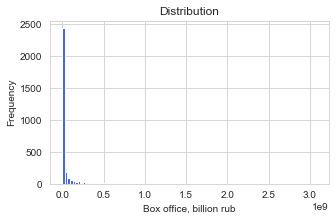

In [41]:
total_df[total_df['box_office'].notna()].plot(y='box_office',
        kind='hist',
        grid=True,
        bins=100,
        figsize=(5, 3),
        legend=False,
        color='royalblue')
plt.title('Distribution')
plt.xlabel('Box office, billion rub')
plt.ylabel('Frequency')

total_df['box_office'].describe()


count    3.157000e+03
mean     7.650291e+07
std      2.403873e+08
min      0.000000e+00
25%      8.638600e+04
50%      2.330104e+06
75%      2.398312e+07
max      3.073569e+09
Name: box_office, dtype: float64

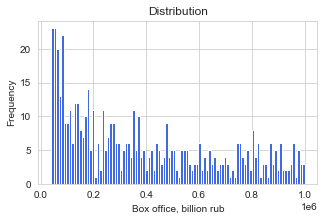

In [42]:
total_df[total_df['box_office'].notna()].plot(y='box_office',
        kind='hist',
        grid=True,
        bins=100,
        figsize=(5, 3),
        range=(40000,1000000),
        legend=False,
        color='royalblue')
plt.title('Distribution')
plt.xlabel('Box office, billion rub')
plt.ylabel('Frequency')

total_df['box_office'].describe()


Too small values were found in the collection data. But we will need further data that does not contain information about fees, so we will not delete them.

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

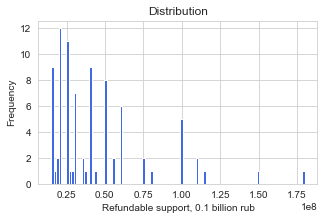

In [43]:
total_df[total_df['refundable_support'] > 10000000].plot(y='refundable_support',
        kind='hist',
        grid=True,
        bins=100,
        figsize=(5, 3),
        legend=False,
        color='royalblue')
plt.title('Distribution')
plt.xlabel('Refundable support, 0.1 billion rub')
plt.ylabel('Frequency')

total_df['refundable_support'].describe()


count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

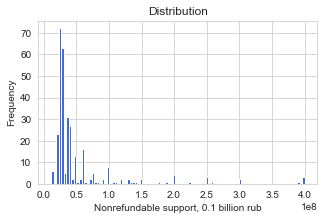

In [44]:
total_df[total_df['nonrefundable_support'] > 10000000].plot(y='nonrefundable_support',
        kind='hist',
        grid=True,
        bins=100,
        figsize=(5, 3),
        legend=False,
        color='royalblue')
plt.title('Distribution')
plt.xlabel('Nonrefundable support, 0.1 billion rub')
plt.ylabel('Frequency')

total_df['nonrefundable_support'].describe()


count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

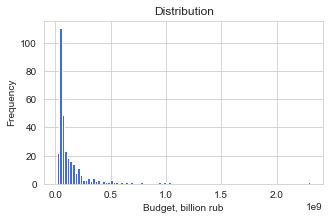

In [45]:
total_df[total_df['budget'] > 10000000].plot(y='budget',
        kind='hist',
        grid=True,
        bins=100,
        figsize=(5, 3),
        legend=False,
        color='royalblue')
plt.title('Distribution')
plt.xlabel('Budget, billion rub')
plt.ylabel('Frequency')

total_df['budget'].describe()


There are no oitliers in `refundable_support`, `nonrefundable_support`, `budget` columns.

count    6514.000000
mean        6.488210
std         1.114435
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64

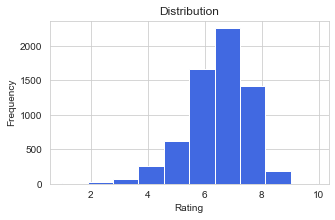

In [46]:
total_df.plot(y='ratings',
        kind='hist',
        grid=True,
        bins=10,
        figsize=(5, 3),
        legend=False,
        color='royalblue')
plt.title('Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

total_df['ratings'].describe()

In [47]:
count = 0
budget_small = pd.DataFrame()

for i in range(len(total_df)):
   
    if (total_df.iloc[i, 11] - total_df.iloc[i, 9] - total_df.iloc[i, 10]) < 0:
        count += 1
        budget_small = budget_small.append(total_df.iloc[i], ignore_index=False)
    
print(count)    
budget_small 

17


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


In [48]:
total_df.loc[(total_df.budget == 0),'budget'] = total_df['nonrefundable_support'] + total_df['refundable_support']
print(len(total_df[total_df['budget'] == 0]))

0


Find that 17 films have a budget column of 0, while they were allocated state funds. Replace these 0 with the sum of the two columns `refundable_support` and `nonrefundable_support`

## Feature Engineering

### Year

In [49]:
total_df['year_show'] = total_df['show_start_date'].dt.year 

In [50]:
total_df['year_show'].describe()

count    7468.000000
mean     2014.587038
std         3.006765
min      2010.000000
25%      2012.000000
50%      2015.000000
75%      2017.000000
max      2019.000000
Name: year_show, dtype: float64

### Producer

In [51]:
total_df['first_producer'] = total_df['producer'].str.split(',').str[0]

### Жанр

In [52]:
total_df['first_genre'] = total_df['genres'].str.split(',').str[0]

In [53]:
# final data set
total_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show,first_producer,first_genre
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Дэвид Валдес,боевик
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Unknown,драма
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Джим Лемли,фантастика


In [54]:
total_df['support_share'] = (total_df['refundable_support'] + total_df['nonrefundable_support']) / total_df['budget']
total_df['support_share'].describe()

count    332.000000
mean       0.542098
std        0.196925
min        0.044043
25%        0.384615
50%        0.614038
75%        0.661412
max        1.000000
Name: support_share, dtype: float64

**Resume**

- Missing values have been processed: Depending on the type of data, gaps have been filled in, removed or left unchanged
- Duplicates have been processed
- Categorical and quantitative data were processed: incorrect values were removed, the data was brought to one form
- New columns have been added


## Analysis of films by year

**Distribution of films by years**

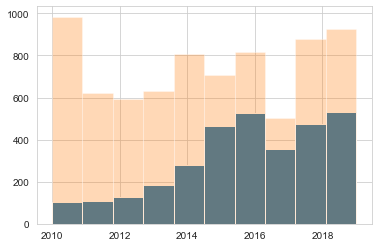

In [55]:
total_df[total_df['box_office'].notna()]['year_show'].hist()
total_df['year_show'].hist(alpha=0.3)
plt.show()

In [56]:
print(len(total_df[total_df['box_office'].notna()]['year_show']) / len(total_df['year_show']))

0.42273701124799146


Movies with box_office data make up about 42% of all data.

**Number of box office films**

In [57]:
total_year = total_df.pivot_table(index='year_show', values='title', aggfunc='count')
total_year.columns = ['count']
total_year

,count
year_show,
2010,984
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,879


In [58]:
total_year_with_box_office = total_df[total_df['box_office'].notna()].pivot_table(index='year_show', values='title', aggfunc='count')
total_year_with_box_office.columns = ['count']
total_year_with_box_office

,count
year_show,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,474


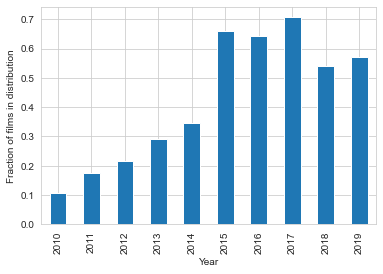

In [59]:
total_year_with_box_office['fraction'] = total_year_with_box_office['count'] / total_year['count']
total_year_with_box_office.plot(
                                y='fraction',
                                kind='bar',
                                legend=False
                                )
plt.xlabel('Year')
plt.ylabel('Fraction of films in distribution')
plt.show()

Starting from 2015, the amount of  data increased sharply and remained at approximately the same level thereafter.

**Min and Max box_office**

In [60]:
total_df['box_office'].max()

3073568690.79

In [61]:
box_office_pivot = total_df[total_df['box_office'] > total_df['box_office'].quantile(0.1)].pivot_table(index='year_show', values='box_office', aggfunc=['mean', 'sum', 'median', 'max', 'min'])
box_office_pivot.columns = ['mean', 'sum', 'median', 'max', 'min']
box_office_pivot.sort_values(by='sum')

,mean,sum,median,max,min
year_show,,,,,
2010,4.793334e+04,2.396667e+06,6052.500,1.446400e+06,1820.0
2012,9.106504e+04,6.920943e+06,16145.000,2.311220e+06,1920.0
2011,2.100425e+05,1.407284e+07,7185.000,1.161808e+07,1920.0
2013,2.565210e+05,2.975643e+07,10334.500,1.995703e+07,1820.0
2014,3.596572e+07,7.444904e+09,178490.000,1.016411e+09,1815.0
2015,8.757728e+07,3.949735e+10,5443603.000,1.658861e+09,1900.0
2016,9.348885e+07,4.786629e+10,4505722.750,2.048126e+09,1900.0
2019,9.136926e+07,4.842571e+10,4627798.345,3.073569e+09,4398.4
2017,1.360328e+08,4.856371e+10,9968340.000,2.779686e+09,7900.0


- The minimum amount of box_office in 2010 was 2.4 million rubles
- The maximum amount of box_office was 50 billion rubles in 2018

In [62]:
box_office_pivot['min'].idxmin()

2014

In [63]:
box_office_pivot['max'].idxmax()

2019

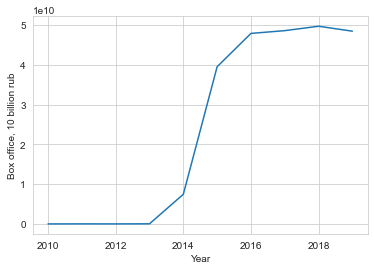

In [64]:
box_office_pivot.plot(
                      y='sum',
                      kind='line',
                      legend=False
                    )
plt.xlabel('Year')
plt.ylabel('Box office, 10 billion rub')
plt.show()

The graph shows that after 2014 there was a sharp jump in box_office

## Analysis of films by age restriction

**Distribution of box office by age category**

In [65]:
age_restriction_pivot = total_df.query('year_show > 2014 & box_office > 80000').pivot_table(index=['age_restriction', 'year_show'], values='box_office', aggfunc=['sum', 'mean', 'median', 'count'])
age_restriction_pivot.columns = ['sum', 'mean', 'median', 'count']

age_restriction_pivot

sum          mean  \
age_restriction                        year_show                               
«0+» - для любой зрительской аудитории 2015       3.789577e+08  1.184243e+07   
                                       2016       1.500704e+08  4.413834e+06   
                                       2017       2.295989e+08  7.653298e+07   
                                       2018       3.244900e+07  6.489800e+06   
                                       2019       1.774607e+07  5.915356e+06   
«12+» - для детей старше 12 лет        2015       1.361571e+10  2.388721e+08   
                                       2016       1.220418e+10  1.718899e+08   
                                       2017       7.851357e+09  2.066147e+08   
                                       2018       1.426713e+10  2.229239e+08   
                                       2019       1.268012e+10  1.527725e+08   
«16+» - для детей старше 16 лет        2015       1.136778e+10  7.478805e+07   
                                       2016       1.666385e+10  1.003846e+08   
                                       2017       1.874504e+10  1.549177e+08   
                                       2018       1.650360e+10  1.057923e+08   
                                       2019       1.275321e+10  7.329431e+07   
«18+» - запрещено для детей            2015       5.431989e+09  4.380636e+07   
                                       2016       6.793674e+09  4.852624e+07   
                                       2017       9.651350e+09  6.656103e+07   
                                       2018       8.759932e+09  4.977234e+07   
                                       2019       1.012172e+10  5.561386e+07   
«6+» - для детей старше 6 лет          2015       8.701648e+09  1.851415e+08   
                                       2016       1.205296e+10  2.078097e+08   
                                       2017       1.208614e+10  2.685809e+08   
                                       2018       1.010497e+10  1.486026e+08   
                                       2019       1.285251e+10  1.626900e+08   

                                                        median  count  
age_restriction                        year_show                       
«0+» - для любой зрительской аудитории 2015       3.681719e+06     32  
                                       2016       3.136770e+06     34  
                                       2017       2.217896e+07      3  
                                       2018       3.616937e+06      5  
                                       2019       3.885434e+06      3  
«12+» - для детей старше 12 лет        2015       5.498206e+07     57  
                                       2016       1.298213e+07     71  
                                       2017       1.829921e+07     38  
                                       2018       1.115330e+07     64  
                                       2019       3.591456e+06     83  
«16+» - для детей старше 16 лет        2015       9.087017e+06    152  
                                       2016       6.896861e+06    166  
                                       2017       9.702077e+06    121  
                                       2018       9.010639e+06    156  
                                       2019       3.262237e+06    174  
«18+» - запрещено для детей            2015       5.803275e+06    124  
                                       2016       8.564825e+06    140  
                                       2017       8.216845e+06    145  
                                       2018       8.160632e+06    176  
                                       2019       5.658057e+06    182  
«6+» - для детей старше 6 лет          2015       3.833450e+07     47  
                                       2016       7.756665e+06     58  
                                       2017       5.199210e+07     45  
                                       2018       1.468885e+07     68  
                          

- Внутри одной категории суммы сборов несильно колеблются по годам.

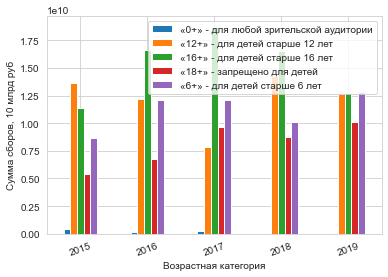

In [66]:
(total_df.query('year_show > 2014 & box_office > 80000')
 .pivot_table(index='year_show',
              columns='age_restriction',
              values='box_office',
              aggfunc='sum')
 .plot(kind='bar'))

plt.ylabel('Сумма сборов, 10 млрд руб')
plt.xlabel('Возрастная категория')
plt.xticks([0, 1, 2, 3, 4], ['2015', '2016', '2017', '2018', '2019'],
           rotation=20)
plt.legend(loc='upper right')

plt.show()

**Resume**
- Films 16+ turned out to have the biggest box_office, regardless of the year. The maximum was reached in 2017.
- The smallest box_office is typical for 0+ films for the entire period of time.
- There is no explicit dependence within one year.

<div style="border: 2px solid green">

*Movies with rental data make up about 42% of all data.*
Starting from 2015, the amount of collection data increased sharply and remained at approximately the same level thereafter.
- The minimum amount of box_office in 2010 was 1.86 million rubles
- The maximum amount of box_office was 50 billion rubles in 2018
- In 2014, the film was released with minimal box_office.
- In 2019, the maximum box office for the film was reached.

*Within one category, fees vary slightly from year to year.*
- Films 16+ turned out to have the biggest box_office, regardless of the year. The maximum was reached in 2017.
- The smallest box_office is typical for 0+ films for the entire period of time.
- There is no explicit dependence within one year.
</div>

## Government Supported Film Analysis

 ### Dataset

Cut the data only for films with government support.

In [67]:
new_df = total_df[total_df['budget'].notna()]


In [68]:
new_df['gov_support'] = new_df['refundable_support'] + new_df['nonrefundable_support']

In [69]:
new_df['ratio_sup_box'] = new_df['gov_support'] / new_df['box_office']
new_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year_show,first_producer,first_genre,support_share,gov_support,ratio_sup_box
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703,26500000.0,72.532473
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,Unknown,28140.0,2014,А.Тютрюмов,Unknown,0.700000,26000000.0,923.951670
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.612691,107847945.0,5.404007
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,55917.5,2014,Л.Антонова,драма,0.690095,28000000.0,500.737694
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,232100.0,2014,А.Миндадзе,драма,0.624764,25000000.0,107.712193


In [70]:
new_df['ratio_sup_box'].describe()

count      318.000000
mean       177.597287
std       1369.533646
min          0.019521
25%          0.582871
50%          2.274750
75%         24.653438
max      22580.645161
Name: ratio_sup_box, dtype: float64

Less than 50% of films with government support pay off at the box office.

### Distribution by year

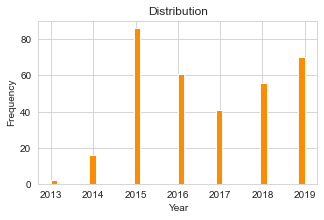

In [71]:
new_df.plot(y='year_show',
            kind='hist', 
            bins=40, 
            grid=True, 
            figsize=(5, 3), 
            legend=False, 
            color='darkorange')
plt.title('Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In 2015, the number of grants increased dramatically. Since 2016, it has remained at approximately the same level.

In [72]:
year_support_pivot = new_df.pivot_table(index='year_show',
                                        values='gov_support',
                                        aggfunc=['count', 'median', 'max', 'min'])
year_support_pivot.columns = ['count', 'median', 'max', 'min']
year_support_pivot.sort_values(by='median')

,count,median,max,min
year_show,,,,
2014,16,27500000.0,90000000.0,20000000.0
2015,86,30000000.0,250000000.0,4700000.0
2016,61,35000000.0,450000000.0,6000000.0
2017,41,40000000.0,400000000.0,6000000.0
2019,70,40000000.0,500000000.0,3000000.0
2018,56,45000000.0,260000000.0,15000000.0
2013,2,67173972.5,107847945.0,26500000.0


In [73]:
year_support_pivot['max'].idxmax()

2019

In [74]:
year_support_pivot['min'].idxmin()

2019

- Average grant values have not changed much since 2017.
- Min and max budget has been allocated in 2019.

In [75]:
year_box_office_pivot = new_df.pivot_table(index='year_show',
                                        values='box_office',
                                        aggfunc=['count', 'median', 'max', 'min'])
year_box_office_pivot.columns = ['count', 'median', 'max', 'min']
year_box_office_pivot.sort_values(by='median')

,count,median,max,min
year_show,,,,
2014,16,5504517.85,3.933446e+08,28140.0
2015,85,9200824.50,7.049282e+08,1550.0
2013,2,10161192.55,1.995703e+07,365353.6
2016,60,17921115.61,1.402255e+09,9000.0
2019,60,25977291.30,3.073569e+09,75850.0
2018,56,27023390.31,2.271754e+09,55685.0
2017,39,50451949.00,2.779686e+09,168512.0


Box_office do not depend on the year of issue.

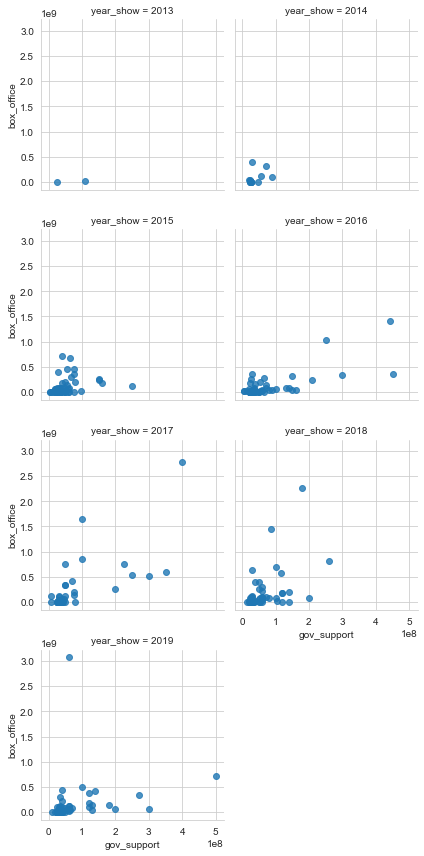

In [76]:
vis1 = sns.lmplot(data=new_df,
                  x='gov_support',
                  y='box_office',
                  fit_reg=False,
                  col='year_show',
                  aspect=1,
                  col_wrap=2,
                  height=3)

There is no strong correlation between government support and box_office.

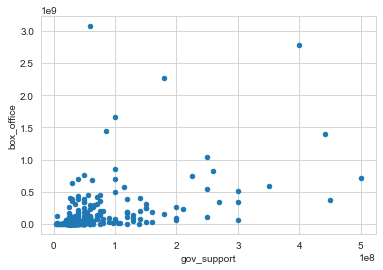

In [77]:
new_df.plot(x='gov_support',
            y='box_office',
            kind='scatter'
           )
plt.show()

### Type

In [78]:
type_support_pivot = new_df.pivot_table(index='type',
                                        values='gov_support',
                                        aggfunc=['count', 'median', 'max', 'min'])
type_support_pivot.columns = ['count', 'median', 'max', 'min']
type_support_pivot.sort_values(by='median')

,count,median,max,min
type,,,,
Документальный,1,3000000.0,3000000.0,3000000.0
Художественный,300,34225000.0,500000000.0,4700000.0
Анимационный,31,70000000.0,200000000.0,11520000.0


- Most of the money is allocated to animated films. At the same time, the maximum budget was allocated for fiction.
- Only one documentary was supported.

### Age restriction

In [79]:
age_restriction_support_pivot = new_df.pivot_table(index='age_restriction',
                                                   values=['gov_support', 'ratio_sup_box'],
                                                   aggfunc=['sum', 'median', 'count'])
age_restriction_support_pivot.columns = ['sum','ratio_sum', 'median','ratio_median','count','ratio_count']

age_restriction_support_pivot.sort_values(by='count')

,sum,ratio_sum,median,ratio_median,count,ratio_count
age_restriction,,,,,,
«0+» - для любой зрительской аудитории,2.735200e+08,611.339831,29500000.0,0.620255,8,5
«18+» - запрещено для детей,1.012347e+09,9094.450143,30000000.0,17.001280,28,28
«6+» - для детей старше 6 лет,5.546374e+09,879.616662,50000000.0,1.109106,65,65
«12+» - для детей старше 12 лет,7.799394e+09,38317.011089,41750000.0,1.489410,106,100
«16+» - для детей старше 16 лет,5.569053e+09,7573.519694,30000000.0,5.161559,125,120


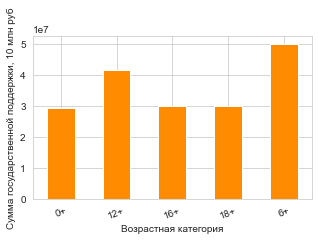

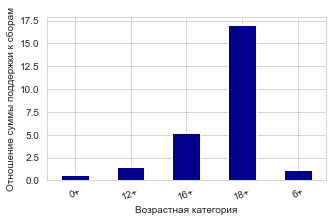

In [80]:
age_restriction_support_pivot.plot(y='median',
                                   kind='bar', 
                                   grid=True, 
                                   figsize=(5, 3), 
                                   legend=False, 
                                   color='darkorange')
plt.ylabel('Сумма государственной поддержки, 10 млн руб')
plt.xlabel('Возрастная категория')
plt.xticks([0, 1, 2, 3, 4], ['0+', '12+', '16+', '18+', '6+'],
       rotation=20)
age_restriction_support_pivot.plot(y='ratio_median',
                                   kind='bar', 
                                   grid=True, 
                                   figsize=(5, 3), 
                                   legend=False, 
                                   color='darkblue')
plt.ylabel('Отношение суммы поддержки к сборам')
plt.xlabel('Возрастная категория')
plt.xticks([0, 1, 2, 3, 4], ['0+', '12+', '16+', '18+', '6+'],
       rotation=20)
plt.show()

- On average, the same amount of money is allocated to all age categories.
- Maximum amount - category 6+
- The least paid back films are 18+ category
- The most paid back - 0+ and 6+

### Genre


In [81]:
genre_support_pivot = new_df.pivot_table(index='first_genre',
                                         values='gov_support',
                                         aggfunc=['sum', 'median', 'count'])
genre_support_pivot.columns = ['sum', 'median', 'count']

genre_support_pivot.sort_values(by='sum')

,sum,median,count
first_genre,,,
реальное ТВ,5.300000e+07,53000000.0,1
биография,1.125100e+08,27510000.0,3
детский,1.190000e+08,29500000.0,4
мюзикл,2.404531e+08,37576559.5,4
криминал,2.800000e+08,40000000.0,3
боевик,3.340000e+08,42500000.0,6
семейный,3.390000e+08,35000000.0,7
ужасы,3.550000e+08,30000000.0,10
мелодрама,3.980000e+08,27500000.0,15


In [82]:
genre_support_ratio_pivot = new_df.pivot_table(index='first_genre',
                                         values='ratio_sup_box',
                                         aggfunc=['median', 'min', 'max'])
genre_support_ratio_pivot.columns = ['median', 'min', 'max']

genre_support_ratio_pivot.sort_values(by='median')

,median,min,max
first_genre,,,
спорт,0.237123,0.143901,0.773460
биография,0.525900,0.068466,25.293071
приключения,0.542938,0.047351,80.435362
семейный,0.553317,0.290919,72.403357
мультфильм,0.706570,0.056743,538.744725
фантастика,0.724492,0.240773,163.150102
история,0.818793,0.592813,4.349193
боевик,0.822317,0.113765,147.457626
ужасы,0.929465,0.142207,498.661924


- Most of the money is allocated to dramas and comedies, both in terms of the number of films and the amount of funds.
- The biggest box fall on films in the category "sports", "biography".

### What is the average rating for films with grant

In [83]:
new_df[new_df['budget'] == 0]['budget'] = new_df['nonrefundable_support'] + new_df['refundable_support']

In [84]:
new_df['ratings'].describe()

count    316.000000
mean       6.020886
std        1.148943
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

Most films with grant support have a rating on Kinopoisk less than 7

### Are Kinopoisk rating and box office related?


In [85]:
def rating_group(rating):
    if rating >= 8:
        return 'высокий'
    elif rating < 5:
        return 'низкий'
    else:
        return 'средний'
    
new_df['rating_category'] = new_df['ratings'].apply(rating_group)

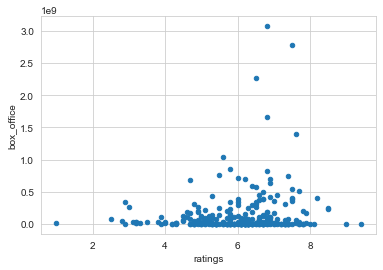

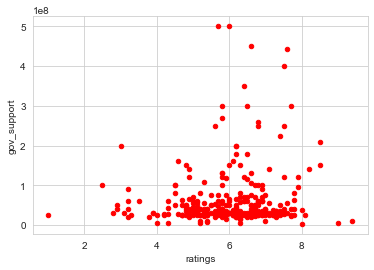

In [86]:
new_df.plot(x='ratings',
            y='box_office',
            kind='scatter'
           )

new_df.plot(x='ratings',
            y='gov_support',
            kind='scatter',
            color='red'
           )
plt.show()

So far, there is no obvious correlation.

Limit the ratio to more commercially successful films

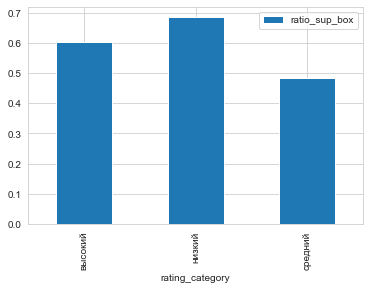

In [87]:
(new_df
.query('ratio_sup_box < 2')
.pivot_table(index='rating_category', 
             values='ratio_sup_box', 
             aggfunc='median')
.plot(kind='bar'))
plt.show()

Films with an average rating of the highest have a good ratio of fees and government support.

Films with low ratings collect less money.

In [88]:
new_df[new_df["ratings"] == new_df["ratings"].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year_show,first_producer,first_genre,support_share,gov_support,ratio_sup_box,rating_category
2146,Главный,111003415,2015-03-27,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,...,9.4,"фантастика,боевик,комедия",334750.0,2015,Ю.Кара,фантастика,0.25,10000000.0,29.87304,высокий


In [89]:
new_df[new_df["ratings"] == new_df["ratings"].min()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year_show,first_producer,first_genre,support_share,gov_support,ratio_sup_box,rating_category
3515,Взломать блогеров,111016616,2016-10-28,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.0,...,1.0,"комедия,мультфильм,фантастика",7323648.0,2016,Т.Бекмамбетов,комедия,0.694131,25000000.0,3.413599,низкий


- The film with the highest rating - "Главный"
- From the lowest - "Взломать блогеров"

### What are the sources of funding

In [90]:
financing_source_pivot = new_df.pivot_table(index='financing_source',
                                         values='gov_support',
                                         aggfunc=['sum', 'median', 'count'])
financing_source_pivot.columns = ['sum', 'median', 'count']

financing_source_pivot.sort_values(by='sum')

,sum,median,count
financing_source,,,
"Министерство культуры, Фонд кино",1.185431e+09,47751149.5,22
Министерство культуры,4.836661e+09,28000000.0,164
Фонд кино,1.417860e+10,60000000.0,146


There are 2 main sources of funding, or the film may be co-financed.

- More money is allocated by the Film Fund.
- More films are financed by the Ministry of Culture.


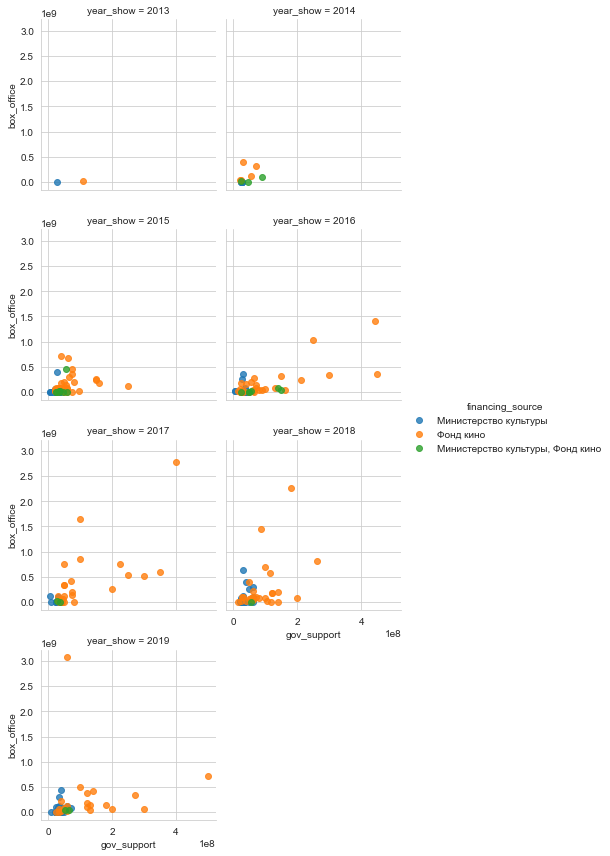

In [91]:
vis2 = sns.lmplot(data=new_df,
                  x='gov_support',
                  y='box_office',
                  fit_reg=False,
                  col='year_show',
                  hue='financing_source',
                  aspect=1,
                  col_wrap=2,
                  height=3)

There is no strong correlation between funding source and fees. The films of the Cinema Fund have higher fees, although in 2016 and 2018 the Ministry of Culture had higher

### Which studios receive the most funding

In [92]:
studio_pivot = new_df.pivot_table(index='film_studio', values=['gov_support', 'box_office'], aggfunc=['count', 'median'])
studio_pivot.columns = ['count_box_office', 'count_gov_support', 'median_box_office', 'median_gov_support']
studio_pivot.sort_values(by='count_box_office', ascending=False).query('count_box_office > 1').head(5)


,count_box_office,count_gov_support,median_box_office,median_gov_support
film_studio,,,,
"ООО ""Студия анимационного кино ""Мельница""",7,7,5.010692e+08,75000000.0
"ООО ""Кинокомпания ""СТВ""",6,6,9.370097e+06,22500000.0
"ООО ""ТаББаК""",6,6,4.957153e+08,100000000.0
"ООО ""ВИЗАРТ ФИЛЬМ""",4,4,1.467568e+08,120000000.0
"ООО ""Продюсерский центр ""Ленфильм""",4,4,4.660821e+06,27500000.0


In [93]:
studio_pivot.sort_values(by='median_box_office', ascending=False).query('count_box_office > 1').head(5)

,count_box_office,count_gov_support,median_box_office,median_gov_support
film_studio,,,,
"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",2,2,2.090971e+09,421052241.0
"ООО ""Студия анимационного кино ""Мельница""",7,7,5.010692e+08,75000000.0
"ООО ""ТаББаК""",6,6,4.957153e+08,100000000.0
"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",2,2,3.356800e+08,67500000.0
"ООО ""Пиманов и партнеры""",3,3,2.535752e+08,50000000.0


In [94]:
studio_pivot.sort_values(by='median_gov_support', ascending=False).query('count_box_office > 1').head(5)

,count_box_office,count_gov_support,median_box_office,median_gov_support
film_studio,,,,
"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",2,2,2.090971e+09,421052241.0
"ООО ""Нон-Стоп Продакшн""",3,3,8.812004e+07,300000000.0
"ООО ""Продюсерская фирма Игоря Толстунова""",2,2,2.086798e+08,177500000.0
"ООО ""ВИЗАРТ ФИЛЬМ""",4,4,1.467568e+08,120000000.0
"ООО ""ТаББаК""",6,6,4.957153e+08,100000000.0


Top 3 film studios by the number of supported films:
- ООО "Студия анимационного кино "Мельница"
- ООО "Кинокомпания "СТВ"
- ООО "ТаББаК"	

Top 3 film studios by box office:
- ООО "Студия "ТРИТЭ" Никиты Михалкова"
- ООО "Студия анимационного кино "Мельница"
- ООО "ТаББаК"	

Top 3 film studios by amount of government support:
- ООО "Студия "ТРИТЭ" Никиты Михалкова"
- ООО "Нон-Стоп Продакшн"	
- ООО "Продюсерская фирма Игоря Толстунова"	

### Box office Comparison

In [95]:
no_sup_df = total_df[total_df['budget'].isna()]
no_sup_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show,first_producer,first_genre,support_share
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Дэвид Валдес,боевик,NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Unknown,драма,NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика,NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика,NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Джим Лемли,фантастика,NaN


In [96]:
no_sup_df['box_office'].describe()

count    2.839000e+03
mean     7.023817e+07
std      2.266011e+08
min      0.000000e+00
25%      5.122200e+04
50%      1.967378e+06
75%      1.910707e+07
max      2.576614e+09
Name: box_office, dtype: float64

In [97]:
new_df['box_office'].describe()

count    3.180000e+02
mean     1.324324e+08
std      3.348379e+08
min      1.550000e+03
25%      1.236676e+06
50%      1.572007e+07
75%      1.063730e+08
max      3.073569e+09
Name: box_office, dtype: float64

У фильмов с гос.поддержкой медианное значение сборов выше

**Resume**

1. Since 2016, the number of state-supported films is about 60 films every year.
2. During the period of 2013-2019, 301 feature films were supported.
3. The amount of the grant does not depend on the age category of the film. The maximum amount was allocated for films 6+.
4. Maximum support for "dramas": 5.3 billion rubles, 93 films. Minimum support for "real TV": 53 million rubles, 1 film.
5. Average rating - 6.2
6. The Cinema Fund allocated 14 billion rubles, the Ministry of Culture - 4.8 billion rubles
7. Average receipts for films with state funding - 16 million rubles, without government funding - 2 million rubles

## Conclusion


Data on the Russian film distribution market was received. Part of the data on the budget and collections is missing (more than 60%).
1. The most successful year in terms of box office - 2018
2. Films with 16+ and 6+ categories have the highest box office

**Analysis of government-supported films**
1. Less than 50% of government-supported films make money at the box office
2. The average amount of allocated funds is 40 million rubles
3. Film box office does not depend on government support
4. Most Supported Movies - Feature and Animation
5. The most profitable films in the category 0+ and 6+
6. Comedies and dramas get the most money, but sports and biography make the most money.
7. On average, the rating of films with state support is less than 7. The highest fees are for films with an average rating.
8. The Cinema Fund has higher fees and the amount of the allocated budget.

**Government-supported films were found to have higher grossing averages. Most of these films have average ratings, but there are also hits. In general, financed Russian films are quite popular.**